# NASA Exoplanet Archive Tutorial
## Week 3, Intro-to-Astro 2020

-1. What is the [Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/)?

In this tutorial, together we will: 

0. See an example of an exoplanet mass-radius diagram using data from the Exoplanet Archive

1. Learn how to **download** data from the Exoplanet Archive ourselves

2. **Visualize** the radius distribution of transiting exoplanets discovered by the *Kepler* space mission

On your own you will

3. Create an **orbital period vs radius** diagram for the transiting exoplanets from *Kepler*. Comment on any features that you see.

4. Create one more plot of **any two parameters** that you'd like. Write a few sentences explaining why you plotted the parameters you chose. Comment on any features that appear.

For your plots in 3. and 4. make sure you **label your axes with units** and **choose useful axis scales**!

#### Updated June 2020, Joey Murphy

In [1]:
# It's always nice to have a cell at the top of your jupyter notebook for housing all of your import statements
# and "magic commands" (lines that start with %), if any.

# For bonus points: add a comment to your future self on why you're importing each module

# File/directory handling
import os 

# Data handling
import pandas as pd
pd.set_option('display.max_columns', None) # Display all of the columns of a DataFrame

# For math
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# "Magic command" to make the plots appear *inline* in the notebook
%matplotlib inline

# 0. Mass-radius diagram example

In [2]:
# Create a variable for the path to the file containing our example's data
data_dir = 'data'
data_fname = 'confirmed_example.csv'
data_path = os.path.join(data_dir, data_fname) # os.path.join creates a valid path out of the directory and filename
print(f'Data will be loaded from: {data_path}')

Data will be loaded from: data/confirmed_example.csv


In [3]:
# Load the data that's stored in the .csv file from the cell above (csv == comma separated values).
# Load this data into a Pandas DataFrame object using the Pandas function read_csv().

# Use comment keyword argument in read_csv() to ignore the file header (more on this in a minute)
example_data = pd.read_csv(data_path, comment='#')

In [4]:
example_data.head() # What sort of data is contained in this pandas.DataFrame?

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_ttvflag,pl_kepflag,pl_k2flag,pl_nnotes,ra_str,ra,dec_str,dec,st_dist,st_disterr1,st_disterr2,st_distlim,gaia_dist,gaia_disterr1,gaia_disterr2,gaia_distlim,st_optmag,st_optmagerr,st_optmaglim,st_optband,gaia_gmag,gaia_gmagerr,gaia_gmaglim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_mass,st_masserr1,st_masserr2,st_masslim,st_rad,st_raderr1,st_raderr2,st_radlim,rowupdate,pl_facility
0,2MASS J02192210-3925225,b,2MASS J02192210-3925225 b,Imaging,0,1,NaN,NaN,NaN,NaN,156.00000,10.00000,-10.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.90000,1.10000,-1.10000,0,Mass,1.44,0.030,-0.030,0,NaN,NaN,NaN,NaN,0,0,0,0,02h19m22.11s,34.842106,-39d25m22.5s,-39.422928,39.40,2.60,-2.60,0,40.09,0.19,-0.19,0.0,NaN,NaN,NaN,NaN,15.012,NaN,0.0,3064.0,76.0,-76.0,0.0,0.11,0.01,-0.01,0.0,0.28,0.01,-0.01,0.0,2015-05-14,Cerro Tololo Inter-American Observatory
1,2MASS J21402931+1625183 A,b,2MASS J21402931+1625183 A b,Imaging,0,1,7336.500000,1934.500000,-584.000000,0.0,NaN,NaN,NaN,NaN,0.26,0.06,-0.06,0.0,46.20,2.50,-8.70,0.0,20.95000,83.79000,-20.95000,0,Mass,0.92,0.390,-0.360,0,NaN,NaN,NaN,NaN,0,0,0,0,21h40m29.32s,325.122159,+16d25m18.3s,16.421759,25.00,10.00,-10.00,0,33.12,0.48,-0.48,0.0,NaN,NaN,NaN,NaN,17.396,NaN,0.0,2300.0,80.0,-80.0,0.0,0.08,0.06,-0.06,0.0,0.12,0.05,-0.04,0.0,2014-05-14,W. M. Keck Observatory
2,55 Cnc,e,55 Cnc e,Radial Velocity,0,5,0.736539,0.000007,-0.000007,0.0,0.01544,0.00009,-0.00009,0.0,NaN,NaN,NaN,NaN,83.30,0.90,-0.80,0.0,0.02542,0.00098,-0.00098,0,Mass,0.17,0.007,-0.007,0,6.4,0.8,-0.7,0.0,0,0,0,1,08h52m35.81s,133.149216,+28d19m50.9s,28.330818,12.59,0.01,-0.01,0,12.59,0.01,-0.01,0.0,5.960,0.010,0.0,V (Johnson),5.714,NaN,0.0,5196.0,24.0,-24.0,0.0,0.91,0.01,-0.01,0.0,0.94,0.01,-0.01,0.0,2019-01-31,McDonald Observatory
3,BD+20 594,b,BD+20 594 b,Transit,0,1,41.685500,0.003000,-0.003000,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.0,89.55,0.16,-0.16,0.0,0.07000,0.03000,-0.03000,0,Mass,0.23,0.010,-0.010,0,NaN,NaN,NaN,NaN,0,0,1,1,03h34m36.23s,53.650967,+20d35m57.2s,20.599232,180.39,1.25,-1.25,0,180.39,1.25,-1.25,0.0,11.038,0.047,0.0,V (Johnson),10.864,NaN,0.0,5766.0,99.0,-99.0,0.0,1.67,0.40,-0.40,0.0,1.08,0.06,-0.06,0.0,2018-04-26,K2
4,CT Cha,b,CT Cha b,Imaging,0,1,NaN,NaN,NaN,NaN,440.00000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.00000,6.00000,-6.00000,0,Mass,2.20,0.810,-0.600,0,NaN,NaN,NaN,NaN,0,0,0,0,11h04m09.09s,166.037877,-76d27m19.4s,-76.455383,165.00,30.00,-30.00,0,191.78,0.78,-0.78,0.0,NaN,NaN,NaN,NaN,11.773,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-05-14,Paranal Observatory


In [5]:
# What are the dimensions of this DataFrame?
print(example_data.shape) # prints (# of rows, # of columns)

(762, 72)


What do all of these columns mean? Let's checkout the .csv file itself for more information!

...

So we saw that this table was generated from the Exoplanet Archive, and whoever generated it enforced some constraints: the mass and radius (in units of Jupiter mass and radius) must **not** be *null* i.e. we only want to download planets that have both a radius **and** a mass measurement.

We also saw that there were a **ton** of columns that we didn't really mention in that table, and some are a little more useful than others. That's okay, for now let's just load *all* of the data into a Pandas DataFrame and then we can choose which columns we actually want to use.

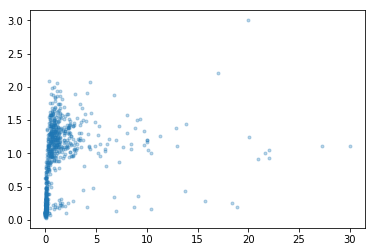

In [6]:
# Make a quick mass-radius diagram!

# Plot the data with mass (in units of Jupiter masses) on the x-axis and radius 
# (in units of Jupiter radii) on the y-axis.

# '.'   --> use small unconnected dots to plot the data points
# alpha --> governs the transparency of each datapoint: 0 = completely transparent, 1 = completely opaque.
# (alpha = 0.3 will let us see the density of the data points more easily)
plt.plot(example_data['pl_bmassj'], example_data['pl_radj'], '.', alpha=0.3)

# At the end, show the plot
plt.show()

The plot above is alright, but it seems like a lot of data is bunched up at low masses and the large range of the data makes it hard to see the finer structure... let's replot things with **log axes**. Let's also add **axis labels** so we actually know what is being plotted. As a bonus, we'll add some text to the plot to show **how many** exoplanets are being included.

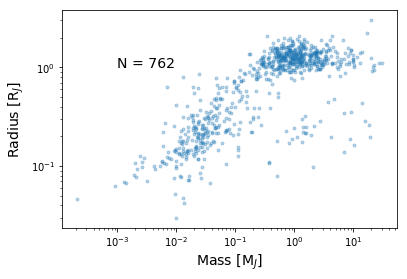

In [7]:
# Plot the data with mass (in units of Jupiter masses) on the x-axis
plt.plot(example_data['pl_bmassj'], example_data['pl_radj'], '.', alpha=0.3)

# Label your axes with units!
plt.xlabel('Mass [M$_J$]', fontsize=14)   # You can use LaTex formatting to make your plots look more professional...
plt.ylabel('Radius [R$_J$]', fontsize=14) # more on LaTex later in the summer! $_J$ creates a subscript J for Jupiter

# Add some text to the plot so we know how many data points there are
n_planets = len(example_data) # Number of planets being plotted

# plt.text(x-coordinate, y-coordinate, text string, **kwargs) # x and y coordinates are in data units
plt.text(1e-3, 1, f'N = {n_planets}', fontsize=14)

# Set the x and y-axis scales to be log so we can see structure more easily
plt.xscale('log')
plt.yscale('log')

# At the end, show the plot
plt.show()

# 1. Downloading a sample of exoplanets subject to constraints

Now that we've plotted some of the data from the Exoplanet Archive, how do we download it ourselves? How did I get that complicated-looking .csv file with all of the data in the first place?

Our mission: 

1. Go to the [Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/) website and navigate to the **Confirmed Planets** table after clicking the **Data** tab at the top of the home page.
2. This time, let's **add columns** so we have **planet mass and radius** in **units of Earth mass and Earth radius**
3. Enter constraints into the query boxes at the top of the columns to get all of the planets **discovered by *Kepler*** via the **transit method**. Make sure to **exclude** any rows that might have a **null radius measurement** for one reason or another.
4. **Download** the table as a **.csv** and **save** it to a **subdirectory** named **"data"**. Be sure to give your .csv file an informative name.

# 2. Visualize the radius distribution of transiting *Kepler* planets

In [8]:
# Like before, let's first create the path to our new .csv file
data_fname = 'confirmed_kepler_transiting.csv'
data_path = os.path.join(data_dir, data_fname)
print(f'Data will be loaded from: {data_path}')

Data will be loaded from: data/confirmed_kepler_transiting.csv


In [9]:
# Load the data into a Pandas DataFrame object
kepler_data = pd.read_csv(data_path, comment='#')

# How many rows and columns do we have this time?
print(kepler_data.shape)

(2317, 80)


Any idea why we have so many rows of planets this time than before? 

*Hint: We the confirmed_example.csv file was generated with a constraint on a different planet parameter that we didn't include here*

In [10]:
kepler_data.head()

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_ttvflag,pl_kepflag,pl_k2flag,pl_nnotes,ra_str,ra,dec_str,dec,st_dist,st_disterr1,st_disterr2,st_distlim,gaia_dist,gaia_disterr1,gaia_disterr2,gaia_distlim,st_optmag,st_optmagerr,st_optmaglim,st_optband,gaia_gmag,gaia_gmagerr,gaia_gmaglim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_mass,st_masserr1,st_masserr2,st_masslim,st_rad,st_raderr1,st_raderr2,st_radlim,rowupdate,pl_masse,pl_masseerr1,pl_masseerr2,pl_masselim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_facility
0,KIC 10525077,b,KIC 10525077 b,Transit,0,1,854.0830,0.01628,-0.01697,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.861,0.096,-0.098,0.0,NaN,NaN,NaN,NaN,NaN,0.491,0.080,-0.071,0,NaN,NaN,NaN,NaN,0,1,0,1,19h09m30.74s,287.378077,+47d46m16.3s,47.771187,1525.31,58.45,-58.45,0,1525.31,58.45,-58.45,0.0,15.355,NaN,0,Kepler-band,15.304,NaN,0.0,6091.0,164.0,-213.0,0.0,1.01,0.12,-0.12,0.0,1.01,0.10,-0.10,0,2016-01-05,NaN,NaN,NaN,NaN,5.5,0.9,-0.8,0,Kepler
1,KIC 3558849,b,KIC 3558849 b,Transit,0,1,1322.3000,386.10000,-11.20000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.973,0.023,-0.031,0.0,NaN,NaN,NaN,NaN,NaN,0.616,0.089,-0.080,0,NaN,NaN,NaN,NaN,0,1,0,0,19h39m47.96s,294.949847,+38d36m18.7s,38.605197,1258.75,35.41,-35.41,0,1258.75,35.41,-35.41,0.0,14.218,NaN,0,Kepler-band,14.167,NaN,0.0,6175.0,168.0,-194.0,0.0,0.98,0.11,-0.11,0.0,1.01,0.11,-0.11,0,2016-01-05,NaN,NaN,NaN,NaN,6.9,1.0,-0.9,0,Kepler
2,KIC 5437945,b,KIC 5437945 b,Transit,0,2,440.7813,0.00563,-0.00577,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.904,0.066,-0.086,0.0,NaN,NaN,NaN,NaN,NaN,0.571,0.143,-0.143,0,NaN,NaN,NaN,NaN,0,1,0,1,19h13m53.97s,288.474857,+40d39m04.9s,40.651357,1322.48,29.86,-29.86,0,1322.48,29.86,-29.86,0.0,13.771,NaN,0,Kepler-band,13.751,NaN,0.0,6340.0,176.0,-199.0,0.0,1.07,0.17,-0.17,0.0,1.24,0.29,-0.29,0,2016-01-05,NaN,NaN,NaN,NaN,6.4,1.6,-1.6,0,Kepler
3,KIC 5951458,b,KIC 5951458 b,Transit,0,1,1320.1000,12401.80000,-152.50000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.799,0.090,-0.120,0.0,NaN,NaN,NaN,NaN,NaN,0.589,2.346,-0.375,0,NaN,NaN,NaN,NaN,0,1,0,0,19h15m57.98s,288.991582,+41d13m22.9s,41.223038,758.78,12.71,-12.71,0,758.78,12.71,-12.71,0.0,12.713,NaN,0,Kepler-band,12.688,NaN,0.0,6258.0,170.0,-183.0,0.0,0.98,0.21,-0.21,0.0,1.52,0.82,-0.82,0,2016-01-05,NaN,NaN,NaN,NaN,6.6,26.3,-4.2,0,Kepler
4,KOI-7892,b,KIC 8540376 b,Transit,0,2,31.8099,0.00919,-0.00933,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.300,0.490,-0.720,0.0,NaN,NaN,NaN,NaN,NaN,0.366,0.196,-0.170,0,NaN,NaN,NaN,NaN,0,1,0,0,18h49m30.61s,282.377530,+44d41m40.5s,44.694592,1106.37,23.26,-23.26,0,1106.37,23.26,-23.26,0.0,14.294,NaN,0,Kepler-band,14.217,NaN,0.0,6474.0,178.0,-267.0,0.0,1.04,0.20,-0.20,0.0,1.26,0.56,-0.56,0,2016-01-05,NaN,NaN,NaN,NaN,4.1,2.2,-1.9,0,Kepler


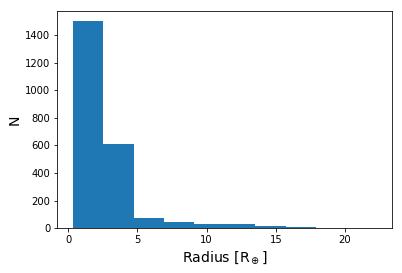

In [11]:
# Make a histogram of planet's in units of Earth radius
plt.hist(kepler_data['pl_rade']) # Plot the histogram

# Label the axes
plt.xlabel('Radius [R$_\oplus$]', fontsize=14)
plt.ylabel('N', fontsize=14)

# Show the plot
plt.show()

Well this histogram isn't very informative... What about using different **bins** for the histogram.

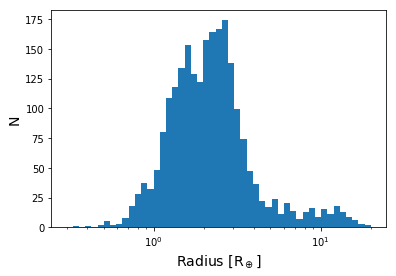

In [12]:
# Create bins that are uniformly-sized in log space
log_bins = np.logspace(np.log10(0.3), np.log10(20), 50)
plt.hist(kepler_data['pl_rade'], bins = log_bins)

# Log scale on the x-axis
plt.xscale('log')

# Label the axes
plt.xlabel('Radius [R$_\oplus$]', fontsize=14) # More LaTex. \oplus gives us the symbol for Earth
plt.ylabel('N', fontsize=14)

# Show the plot
plt.show()

It looks like the distribution of planets has some sort of **bimodality** between about 1 and 2 Earth masses. Let's zoom in on that area by **restricting our x-axis limits**.

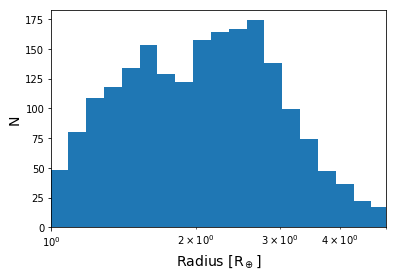

In [13]:
plt.hist(kepler_data['pl_rade'], bins = log_bins) # Using the same bins as above

# Let's zoom in on the distribution of planet radii in this region
plt.xlim([1., 5]) # Units of Earth radius

# Same plot housekeeping as above
# -------------------------------
# Log scale on the x-axis
plt.xscale('log')

# Label the axes
plt.xlabel('Radius [R$_\oplus$]', fontsize=14) # More LaTex. \oplus gives us the symbol for Earth
plt.ylabel('N', fontsize=14)

# Show the plot
plt.show()

Are there **any notable features** in this distribution of planets by radius?

# 3. Orbital period vs Radius for transiting *Kepler* planets

Now it's your turn! Make a plot of the transiting planets discovered by *Kepler* with orbital period on the x-axis and planet radius (in units of Earth radius) on the y-axis. 

Be sure to label your axes with units! Refer to the header in the .csv file for more information. 

# 4. Make your own plot of whatever two parameters you want!

Now make a plot visualizing the relationship (or lack thereof) of any two parameters that you want. Go back to the [Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/) to input constraints (if any) in the Confirmed Table that are relevant to your parameters and download your new data. Spend some time looking at all of the columns available in the Exoplanet Archive data table to see what interests you. (We didn't even get a chance to make use of any of the stellar parameters!)

Make sure you include axis labels and use appropriate axis scales so that you can see features of the data across a wide range of values. Why did you plot what you plotted? Do you notice any interesting features?